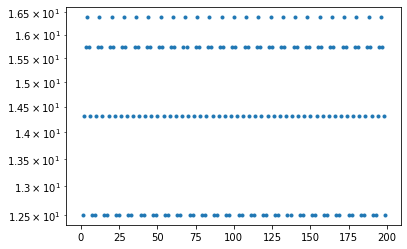

In [75]:
import numpy as np
import random
import matplotlib.pyplot as plt
decksize = 52
deck = np.array([i for i in range(decksize)])
startdeck = deck.copy()


def entropy(deck):
    l = abs(deck-startdeck)
    return np.mean(l)


def badriffle(deck):
    deck = deck.copy().tolist()
    newdeck = np.empty(decksize)
    d1,d2 = deck[:int(len(deck)/2)],deck[int(len(deck)/2):]
    for n in range(len(newdeck)):
        if len(d1)>0 and len(d2)>0:
            c = d1.pop(0) if random.random()>0.5 else d2.pop(0)
            newdeck[n] = c
        elif len(d1)>0:
            newdeck[n:] = d1
            break
        else: 
            newdeck[n:] = d2
            break
    return newdeck

def riffle(deck):
    d1,d2 = deck[:int(len(deck)/2)],deck[int(len(deck)/2):]
    return np.ravel([d1,d2],'F')

runs = 200
entropies = np.zeros(runs)
for i in range(runs):
    entropies[i] = entropy(deck)
    deck = riffle(deck)
    
plt.plot(entropies,'.')
plt.yscale("log")